# Prediction of the house prices in Ontario

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix


In [21]:
hpc = pd.read_csv('house_prices_canada.csv', encoding='iso-8859-1')
hpc.head(5)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


In [22]:
hpc.isna().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

# Data preparation

In [23]:
hpc['Province'].value_counts().sort_index()

Alberta                       3880
British Columbia             11244
Manitoba                       530
New Brunswick                  874
Newfoundland and Labrador      657
Nova Scotia                     91
Ontario                      14015
Quebec                         770
Saskatchewan                  3707
Name: Province, dtype: int64

In [24]:
hpc = hpc.drop(hpc[hpc['Province'] != 'Ontario'].index)
hpc

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
33675,Regina,399900.0,1777 FORGET ST,4,1,Ontario,226404,50.4547,-104.6067,90000.0
34585,Saskatoon,1099900.0,2556 MAYFAIR,3,3,Ontario,266141,52.1333,-106.6833,89000.0
34586,Saskatoon,1149900.0,2552 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0
34587,Saskatoon,1099900.0,2548 MAYFAIR,4,3,Ontario,266141,52.1333,-106.6833,89000.0


In [25]:
hpc['City'].value_counts().sort_index()

Barrie              1012
Brantford            628
Caledon             1336
Guelph               436
Hamilton            1289
Kingston             486
Kitchener           1199
London              1345
Nanaimo                1
Oshawa              1082
Ottawa              1097
Peterborough         307
Regina                 2
Saskatoon              8
Sault Ste. Marie     165
St. Catharines      1268
Sudbury              203
Thunder Bay          154
Toronto             1276
Windsor              720
Winnipeg               1
Name: City, dtype: int64

In [26]:
hpc = hpc.drop(hpc[hpc['City'] == 'Nanaimo'].index)
hpc = hpc.drop(hpc[hpc['City'] == 'Regina'].index)
hpc = hpc.drop(hpc[hpc['City'] == 'Saskatoon'].index)
hpc = hpc.drop(hpc[hpc['City'] == 'Winnipeg'].index)

In [27]:
indicator_city = pd.get_dummies(hpc['City'], prefix='City')
indicator_city

,City_Barrie,City_Brantford,City_Caledon,City_Guelph,City_Hamilton,City_Kingston,City_Kitchener,City_London,City_Oshawa,City_Ottawa,City_Peterborough,City_Sault Ste. Marie,City_St. Catharines,City_Sudbury,City_Thunder Bay,City_Toronto,City_Windsor
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31484,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31485,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31486,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31487,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
hpc2 = hpc.drop(['City', 'Address', 'Province', 'Population', 'Latitude', 'Longitude', 'Median_Family_Income'], axis=1)
hpc2 = hpc2.join(indicator_city)
hpc2

,Price,Number_Beds,Number_Baths,City_Barrie,City_Brantford,City_Caledon,City_Guelph,City_Hamilton,City_Kingston,City_Kitchener,City_London,City_Oshawa,City_Ottawa,City_Peterborough,City_Sault Ste. Marie,City_St. Catharines,City_Sudbury,City_Thunder Bay,City_Toronto,City_Windsor
0,779900.0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,799999.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,799900.0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1200000.0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,668800.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31484,2099888.0,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31485,995000.0,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31486,1199000.0,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31487,1499900.0,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# removing outliers: number of beds and price (number of outliers is somewhat irrelevant 
# as it has high correlation with number of beds)

# beds outliers
x = hpc2["Number_Beds"]
mean = x.mean()
std = x.std() 
hpc2 = hpc2[(hpc2["Number_Beds"] > mean-25*std) & (hpc2["Number_Beds"] < mean+25*std)]

# price outliers
x = hpc2["Price"]
mean = x.mean()
std = x.std() 
hpc2 = hpc2[(hpc2["Price"] > mean-40*std) & (hpc2["Price"] < mean+40*std)]
hpc2

,Price,Number_Beds,Number_Baths,City_Barrie,City_Brantford,City_Caledon,City_Guelph,City_Hamilton,City_Kingston,City_Kitchener,City_London,City_Oshawa,City_Ottawa,City_Peterborough,City_Sault Ste. Marie,City_St. Catharines,City_Sudbury,City_Thunder Bay,City_Toronto,City_Windsor
0,779900.0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,799999.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,799900.0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1200000.0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,668800.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31484,2099888.0,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31485,995000.0,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31486,1199000.0,4,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31487,1499900.0,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
min_max = MinMaxScaler()
hpc_scaled = min_max.fit_transform(hpc2)
hpc_scaled = pd.DataFrame(hpc_scaled, index=hpc2.index, columns=hpc2.columns)
hpc_scaled

,Price,Number_Beds,Number_Baths,City_Barrie,City_Brantford,City_Caledon,City_Guelph,City_Hamilton,City_Kingston,City_Kitchener,City_London,City_Oshawa,City_Ottawa,City_Peterborough,City_Sault Ste. Marie,City_St. Catharines,City_Sudbury,City_Thunder Bay,City_Toronto,City_Windsor
0,0.054407,0.063830,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.055856,0.063830,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.055849,0.042553,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.084685,0.085106,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.046400,0.021277,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31484,0.149541,0.085106,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31485,0.069910,0.063830,0.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31486,0.084613,0.085106,0.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31487,0.106299,0.085106,0.08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


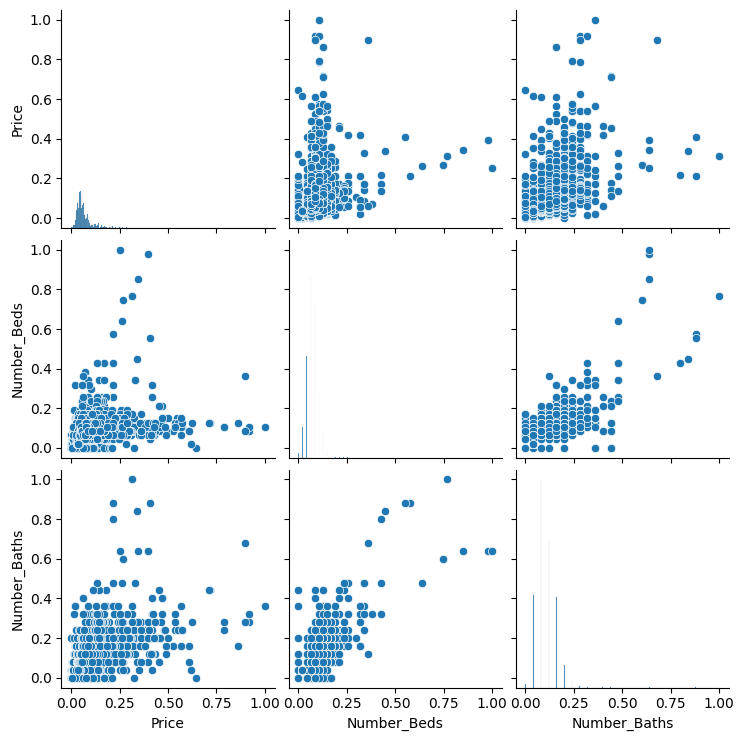

In [31]:
sns.pairplot(hpc_scaled[['Price', 'Number_Beds', 'Number_Baths']])

# Polynomial Regression

In [32]:
X = hpc_scaled.drop(['Price'], axis = 1)
y = hpc_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

deg = 2
poly_features = PolynomialFeatures(degree=deg, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

train_predictions = poly_model.predict(X_train_poly)
test_predictions = poly_model.predict(X_test_poly)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MAE:", train_mae)
print("Train MSE:", train_mse)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

Train MAE: 0.020796807426494663
Train MSE: 0.0016218898490012023
Test MAE: 0.02097631481863668
Test MSE: 0.001568005252171725


# Linear Regression

In [34]:
X = hpc_scaled.drop(['Price'], axis = 1)
y = hpc_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train MAE:", train_mae)
print("Train MSE:", train_mse)
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)

Train MAE: 0.02215764309062742
Train MSE: 0.0018337330064501307
Test MAE: 0.021783043997776735
Test MSE: 0.0015718901820345494


# Cross-validation

In [36]:
from sklearn.model_selection import cross_validate,KFold,ShuffleSplit

In [37]:
cv_results=cross_validate(model,X,y,cv=10,scoring='neg_mean_squared_error')

In [38]:
result=-cv_results["test_score"].mean()
result

1.4062925455951217e+20

(array([6., 1., 1., 0., 0., 0., 0., 0., 1., 1.]),
 array([9.26854036e-04, 6.47544171e+19, 1.29508834e+20, 1.94263251e+20,
        2.59017668e+20, 3.23772086e+20, 3.88526503e+20, 4.53280920e+20,
        5.18035337e+20, 5.82789754e+20, 6.47544171e+20]),
 <BarContainer object of 10 artists>)

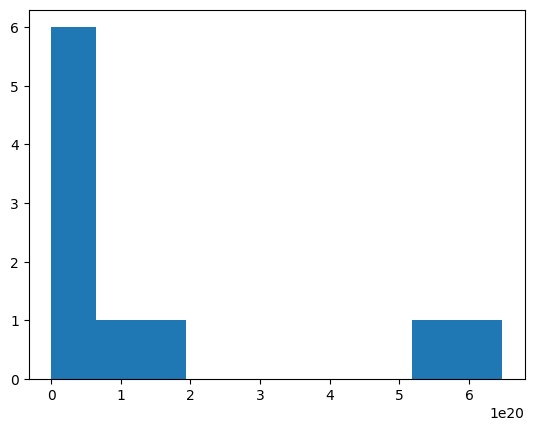

In [39]:
plt.hist(-cv_results["test_score"])

# LOOCV

In [40]:
#It takes 3 minutes to perform this task
cv_results=cross_validate(model,X,y,cv=X.shape[0],scoring="neg_mean_squared_error")
-cv_results["test_score"].mean()

0.0017885044305407925

# Bootstrap

In [41]:
from sklearn.utils import resample

In [42]:
bootstrap_estimates= []
n_iterations= 1_000
n_size=int(len(X)*0.7)

In [43]:

for i in range(n_iterations):
    #prepare the train and test values
    X_sample, y_sample=resample(X_train,y_train, n_samples=n_size)

    

    #fit model
    model=LinearRegression()
    model.fit(X_sample,y_sample)

    #We evaluate the model
    predictions=model.predict(X_test)
    score= mean_squared_error(y_test,predictions)
    bootstrap_estimates.append(score)


In [44]:
# Calculate 95% confidence interval
alpha = 0.95
lower_p = ((1.0-alpha)/2.0) * 100
upper_p = (alpha+((1.0-alpha)/2.0)) * 100
lower = np.percentile(bootstrap_estimates, lower_p)
upper = np.percentile(bootstrap_estimates, upper_p)

print(f'{alpha*100} confidence interval {lower*100} and {upper*100}')

95.0 confidence interval 0.15697454896895632 and 0.15890780322745174
